In [4]:
import os, pathlib
os.chdir("/Users/gregcc/Documents/GitHub/SURP25/Microlensing")

In [5]:
from astropy.io import ascii
import matplotlib.pyplot as plt
import numpy as np
from ML import TwoLens1S
from ML import ThreeLens1S

# Parameters

In [6]:
#parameters from Liebig, et al; (2010)
q2 = 1e-3
q3 = 1e-5
s2 = 1.3
s3 = 1.3003845585056752
psi = 1.393457227228705
q4 = q3 + q2 #for binary system
u0_list =[-0.015] #paper

t0 = 0
tE = 20
rho = 0.0018
rs = rho

secnum = 45
basenum = 2
num_points = 1000

In [7]:
#triple system
triple_model = ThreeLens1S(t0, tE, rho, u0_list, q2, q3, s2, s3, 357, psi, rs, secnum, basenum, num_points)

param = [
    np.log(triple_model.s2), np.log(triple_model.q2), triple_model.u0_list[0], triple_model.alpha_deg,
    np.log(triple_model.rho), np.log(triple_model.tE), triple_model.t0,
    np.log(triple_model.s3), np.log(triple_model.q3), triple_model.psi_rad
]
mag, *_ = triple_model.VBM.TripleLightCurve(param, triple_model.highres_t)

triple_model_tau = triple_model.highres_tau
triple_model_mag = mag

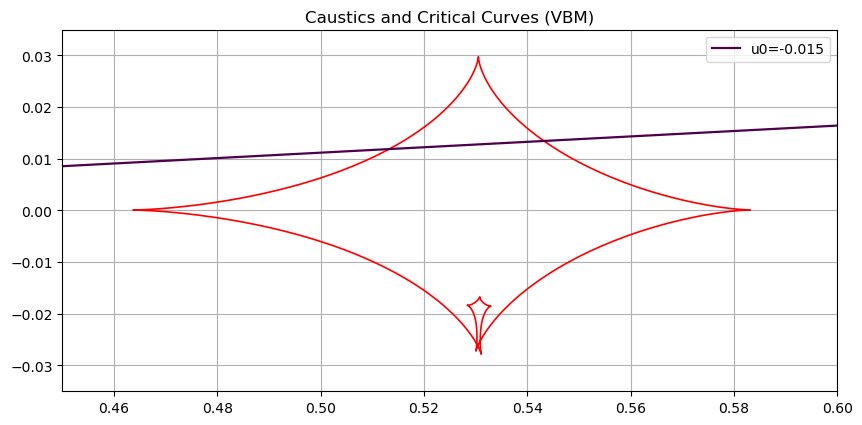

In [8]:
triple_model.plot_caustics_and_critical(show=False)
ax = plt.gca()
ax.set_xlim(0.450, 0.60)
ax.set_ylim(-0.035, 0.035)
plt.show()

In [9]:
#binary system
double_model = TwoLens1S(t0, tE, rho, u0_list, q4, s2, 357, t_lc= triple_model.highres_t )
A_bin = double_model.VBM.BinaryLightCurve([np.log(s2), np.log(q4), u0_list[0], 357,
                                     np.log(rho), np.log(tE), t0], triple_model.highres_t)[0]

binary_model = TwoLens1S(t0, tE, rho, u0_list, q2, s2, 357, t_lc= triple_model.highres_t )
B_bin = binary_model.VBM.BinaryLightCurve([np.log(s2), np.log(q2), u0_list[0], 357,
                                     np.log(rho), np.log(tE), t0], triple_model.highres_t)[0]

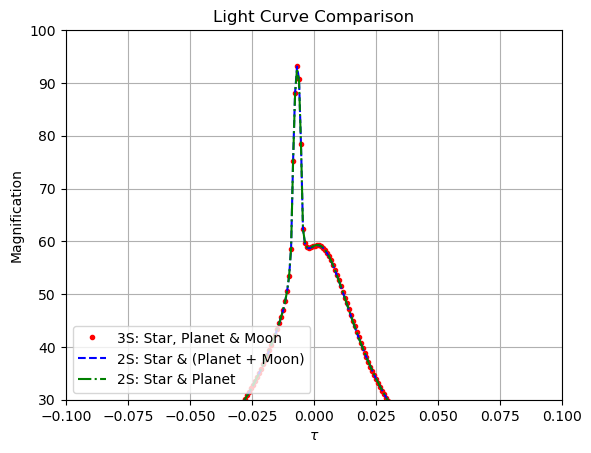

In [22]:
#light curve
plt.plot(triple_model_tau, triple_model_mag, '.', label = "3S: Star, Planet & Moon", color = 'red')
plt.plot(triple_model_tau, A_bin, '--', label = "2S: Star & (Planet + Moon)", color = 'blue')
plt.plot(triple_model_tau, B_bin, '-.', label = "2S: Star & Planet", color = 'green')

plt.xlim(-.1, .1)
plt.ylim(30, 100)

plt.xlabel(r"$\tau$")
plt.ylabel("Magnification")
plt.title("Light Curve Comparison")
plt.grid(True)
plt.legend(loc = 'lower left')
plt.show()

In [11]:
#setting up centroid
two_system = double_model.systems[0]
binary_system = binary_model.systems[0]
three_system = triple_model.systems[0]

delta_x_two = two_system['cent_x_hr'] - two_system['x_src_hr']
delta_y_two = two_system['cent_y_hr'] - two_system['y_src_hr']

delta_x_two_B = binary_system['cent_x_hr'] - binary_system['x_src_hr']
delta_y_two_B = binary_system['cent_y_hr'] - binary_system['y_src_hr']

delta_x_three = three_system['cent_x'] - three_system['y1s']
delta_y_three = three_system['cent_y'] - three_system['y2s']

delta_x_three = - delta_x_three
delta_y_three = delta_y_three

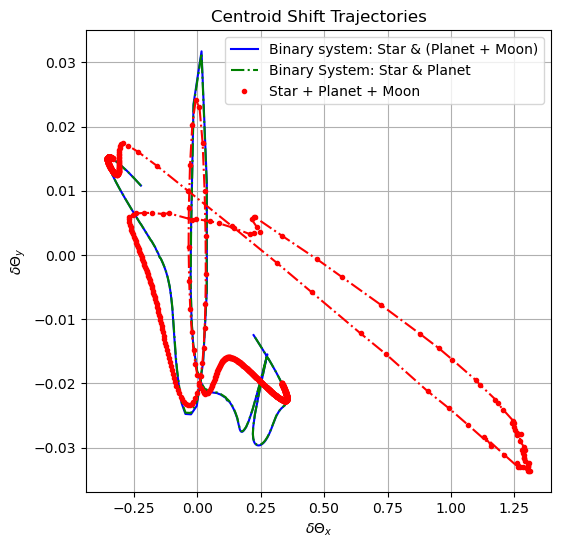

In [20]:
#centroid
plt.figure(figsize=(6,6))
plt.plot(delta_x_two, delta_y_two, 'b-', label='Binary system: Star & (Planet + Moon)')
plt.plot(delta_x_two_B, delta_y_two_B, 'g-.', label='Binary System: Star & Planet')
plt.plot(delta_x_three, delta_y_three, 'r.', label='Star + Planet + Moon')
plt.plot(delta_x_three, delta_y_three, 'r-.')

plt.xlabel(r"$\delta \Theta_x$")
plt.ylabel(r"$\delta \Theta_y$")
plt.title("Centroid Shift Trajectories")
plt.grid(True)

plt.legend()

plt.show()

# Changing Mass

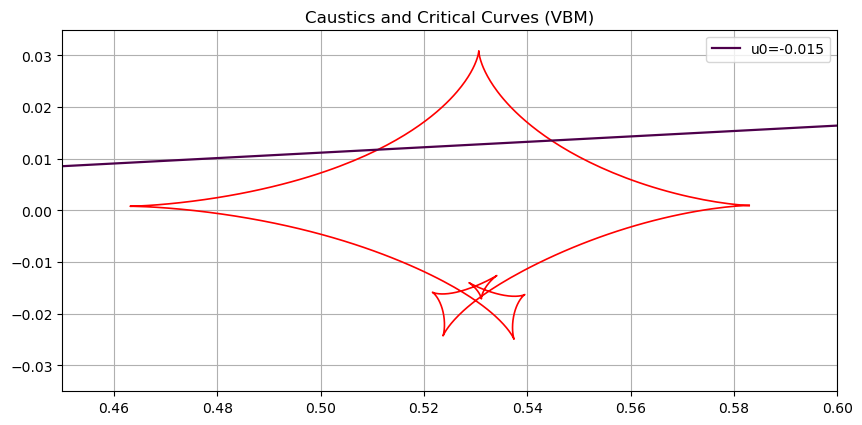

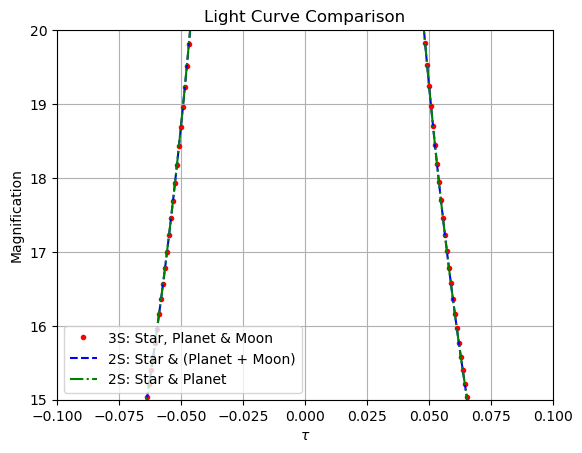

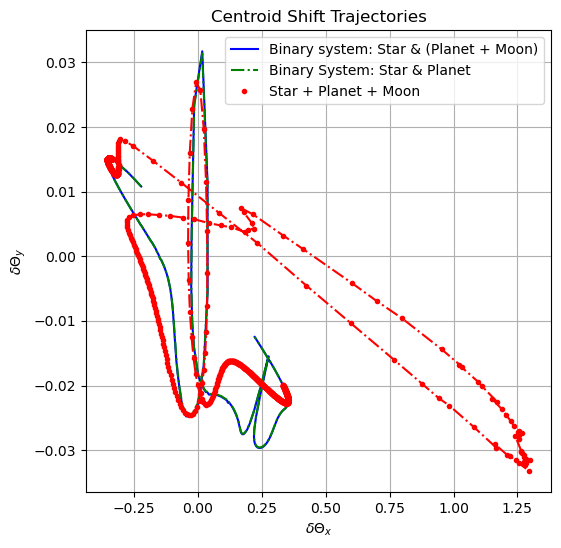

In [23]:
q3 = 1e-4

#triple system
triple_model = ThreeLens1S(t0, tE, rho, u0_list, q2, q3, s2, s3, 357, psi, rs, secnum, basenum, num_points)

param = [
    np.log(triple_model.s2), np.log(triple_model.q2), triple_model.u0_list[0], triple_model.alpha_deg,
    np.log(triple_model.rho), np.log(triple_model.tE), triple_model.t0,
    np.log(triple_model.s3), np.log(triple_model.q3), triple_model.psi_rad
]
mag, *_ = triple_model.VBM.TripleLightCurve(param, triple_model.highres_t)

triple_model_tau = triple_model.highres_tau
triple_model_mag = mag

#binary system
double_model = TwoLens1S(t0, tE, rho, u0_list, q4, s2, 357, t_lc= triple_model.highres_t )
A_bin = double_model.VBM.BinaryLightCurve([np.log(s2), np.log(q4), u0_list[0], 357,
                                     np.log(rho), np.log(tE), t0], triple_model.highres_t)[0]

binary_model = TwoLens1S(t0, tE, rho, u0_list, q2, s2, 357, t_lc= triple_model.highres_t )
B_bin = binary_model.VBM.BinaryLightCurve([np.log(s2), np.log(q2), u0_list[0], 357,
                                     np.log(rho), np.log(tE), t0], triple_model.highres_t)[0]

triple_model.plot_caustics_and_critical(show=False)
ax = plt.gca()
ax.set_xlim(0.450, 0.60)
ax.set_ylim(-0.035, 0.035)
plt.show()

#light curve
plt.plot(triple_model_tau, triple_model_mag, '.', label = "3S: Star, Planet & Moon", color = 'red')
plt.plot(triple_model_tau, A_bin, '--', label = "2S: Star & (Planet + Moon)", color = 'blue')
plt.plot(triple_model_tau, B_bin, '-.', label = "2S: Star & Planet", color = 'green')

plt.xlim(-.1, .1)
plt.ylim(15, 20)

plt.xlabel(r"$\tau$")
plt.ylabel("Magnification")
plt.title("Light Curve Comparison")
plt.grid(True)
plt.legend(loc = 'lower left')
plt.show()

#setting up centroid
two_system = double_model.systems[0]
binary_system = binary_model.systems[0]
three_system = triple_model.systems[0]

delta_x_two = two_system['cent_x_hr'] - two_system['x_src_hr']
delta_y_two = two_system['cent_y_hr'] - two_system['y_src_hr']

delta_x_two_B = binary_system['cent_x_hr'] - binary_system['x_src_hr']
delta_y_two_B = binary_system['cent_y_hr'] - binary_system['y_src_hr']

delta_x_three = three_system['cent_x'] - three_system['y1s']
delta_y_three = three_system['cent_y'] - three_system['y2s']

delta_x_three = - delta_x_three
delta_y_three = delta_y_three

#centroid
plt.figure(figsize=(6,6))
plt.plot(delta_x_two, delta_y_two, 'b-', label='Binary system: Star & (Planet + Moon)')
plt.plot(delta_x_two_B, delta_y_two_B, 'g-.', label='Binary System: Star & Planet')
plt.plot(delta_x_three, delta_y_three, 'r.', label='Star + Planet + Moon')
plt.plot(delta_x_three, delta_y_three, 'r-.')

plt.xlabel(r"$\delta \Theta_x$")
plt.ylabel(r"$\delta \Theta_y$")
plt.title("Centroid Shift Trajectories")
plt.grid(True)

plt.legend()

plt.show()

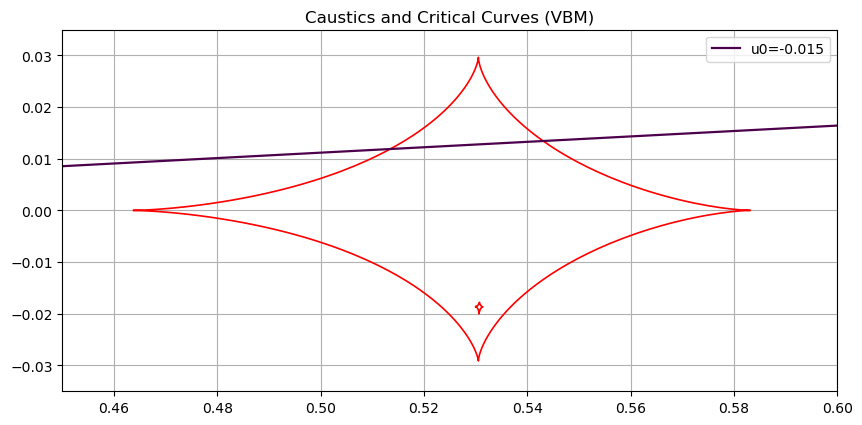

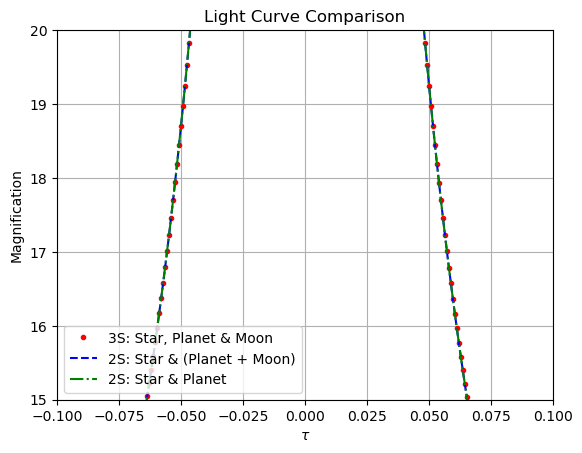

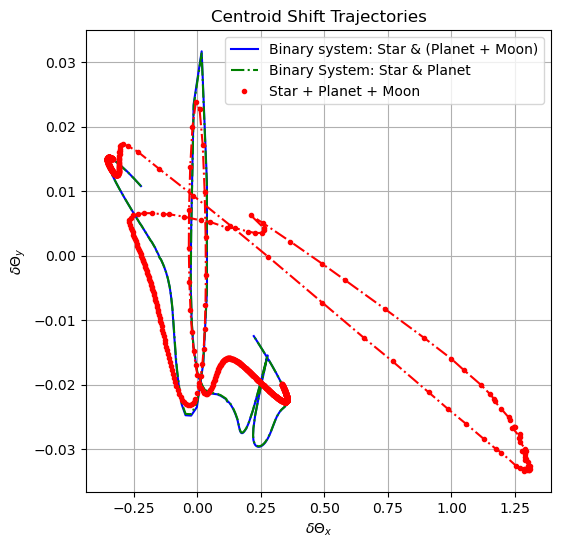

In [24]:
q3 = 1e-6

#triple system
triple_model = ThreeLens1S(t0, tE, rho, u0_list, q2, q3, s2, s3, 357, psi, rs, secnum, basenum, num_points)

param = [
    np.log(triple_model.s2), np.log(triple_model.q2), triple_model.u0_list[0], triple_model.alpha_deg,
    np.log(triple_model.rho), np.log(triple_model.tE), triple_model.t0,
    np.log(triple_model.s3), np.log(triple_model.q3), triple_model.psi_rad
]
mag, *_ = triple_model.VBM.TripleLightCurve(param, triple_model.highres_t)

triple_model_tau = triple_model.highres_tau
triple_model_mag = mag

#binary system
double_model = TwoLens1S(t0, tE, rho, u0_list, q4, s2, 357, t_lc= triple_model.highres_t )
A_bin = double_model.VBM.BinaryLightCurve([np.log(s2), np.log(q4), u0_list[0], 357,
                                     np.log(rho), np.log(tE), t0], triple_model.highres_t)[0]

binary_model = TwoLens1S(t0, tE, rho, u0_list, q2, s2, 357, t_lc= triple_model.highres_t )
B_bin = binary_model.VBM.BinaryLightCurve([np.log(s2), np.log(q2), u0_list[0], 357,
                                     np.log(rho), np.log(tE), t0], triple_model.highres_t)[0]

triple_model.plot_caustics_and_critical(show=False)
ax = plt.gca()
ax.set_xlim(0.450, 0.60)
ax.set_ylim(-0.035, 0.035)
plt.show()

#light curve
plt.plot(triple_model_tau, triple_model_mag, '.', label = "3S: Star, Planet & Moon", color = 'red')
plt.plot(triple_model_tau, A_bin, '--', label = "2S: Star & (Planet + Moon)", color = 'blue')
plt.plot(triple_model_tau, B_bin, '-.', label = "2S: Star & Planet", color = 'green')

plt.xlim(-.1, .1)
plt.ylim(15, 20)

plt.xlabel(r"$\tau$")
plt.ylabel("Magnification")
plt.title("Light Curve Comparison")
plt.grid(True)
plt.legend(loc = 'lower left')
plt.show()

#setting up centroid
two_system = double_model.systems[0]
binary_system = binary_model.systems[0]
three_system = triple_model.systems[0]

delta_x_two = two_system['cent_x_hr'] - two_system['x_src_hr']
delta_y_two = two_system['cent_y_hr'] - two_system['y_src_hr']

delta_x_two_B = binary_system['cent_x_hr'] - binary_system['x_src_hr']
delta_y_two_B = binary_system['cent_y_hr'] - binary_system['y_src_hr']

delta_x_three = three_system['cent_x'] - three_system['y1s']
delta_y_three = three_system['cent_y'] - three_system['y2s']

delta_x_three = - delta_x_three
delta_y_three = delta_y_three

#centroid
plt.figure(figsize=(6,6))
plt.plot(delta_x_two, delta_y_two, 'b-', label='Binary system: Star & (Planet + Moon)')
plt.plot(delta_x_two_B, delta_y_two_B, 'g-.', label='Binary System: Star & Planet')
plt.plot(delta_x_three, delta_y_three, 'r.', label='Star + Planet + Moon')
plt.plot(delta_x_three, delta_y_three, 'r-.')

plt.xlabel(r"$\delta \Theta_x$")
plt.ylabel(r"$\delta \Theta_y$")
plt.title("Centroid Shift Trajectories")
plt.grid(True)

plt.legend()

plt.show()

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def run_triple_orbit_set(
    t0, tE, rho, u0_list,
    q2, qPM_list=(1e-2,),   # default moon/planet; will compute q3 = qPM*q2
    s2=1.3, alpha_deg=357,
    rs=None, secnum=45, basenum=2, num_points=1000,
    phi_deg_list=(0,45,90,135,180,225,270),
    plot_title="Centroid Shift Trajectories (θ_MP = θ_PE)"
):
    """
    For each qPM in qPM_list:
      - Place the moon at the specified phi angles at d = sqrt(q2) (one planetary ER)
      - Build triple models
      - Extract centroid shifts with your sign convention
      - Overlay the 'effective binary' (q4 = q2 + q3) on the same time grid
    Returns a dict of results per qPM.
    """
    if rs is None: rs = rho
    results = {}

    for qPM in qPM_list:
        q3 = q2 * qPM       # star–moon
        q4 = q2 + q3        # effective binary (planet+moon vs star)
        d  = np.sqrt(q2)    # θ_PE

        triples = []
        deltas  = []

        # We’ll define the time grid from the FIRST triple we build
        highres_t_ref = None
        highres_tau_ref = None

        for phi in phi_deg_list:
            s3, psi_deg = Moon_Geometry(s2, d, phi)   # ensure this returns psi in DEGREES

            # Build triple model at this geometry
            ex = ThreeLens1S(t0, tE, rho, u0_list, q2, q3, s2, s3, alpha_deg, psi_deg, rs, secnum, basenum, num_points)

            # Params for VBM triple
            param = [
                np.log(ex.s2), np.log(ex.q2), ex.u0_list[0], ex.alpha_deg,
                np.log(ex.rho), np.log(ex.tE), ex.t0,
                np.log(ex.s3), np.log(ex.q3), ex.psi_rad
            ]
            A_tri, *_ = ex.VBM.TripleLightCurve(param, ex.highres_t)

            sys = ex.systems[0]
            dx = -(sys['cent_x'] - sys['y1s'])   # your sign flips
            dy =  (sys['cent_y'] - sys['y2s'])

            triples.append((phi, ex, A_tri))
            deltas.append((phi, dx, dy))

            if highres_t_ref is None:
                highres_t_ref  = ex.highres_t
                highres_tau_ref = ex.highres_tau

        # Build effective binary on the same grid
        double_model = TwoLens1S(t0, tE, rho, u0_list, q4, s2, alpha_deg, t_lc=highres_t_ref)
        A_bin = double_model.VBM.BinaryLightCurve(
            [np.log(s2), np.log(q4), u0_list[0], alpha_deg, np.log(rho), np.log(tE), t0],
            highres_t_ref
        )[0]

        two_sys = double_model.systems[0]
        dx_bin  = two_sys['cent_x_hr'] - two_sys['x_src_hr']
        dy_bin  = two_sys['cent_y_hr'] - two_sys['y_src_hr']

        # --- Plot
        plt.figure(figsize=(8,8))
        plt.plot(dx_bin, dy_bin, 'b-', label=f'Binary')

        for (phi, dx, dy) in deltas:
            plt.plot(dx, dy, '--', alpha=0.6, label=rf'$\phi={phi}^\circ$')

        plt.xlabel(r"$\delta \Theta_x$")
        plt.ylabel(r"$\delta \Theta_y$")
        plt.title(plot_title)
        plt.grid(True)
        plt.legend()
        plt.show()

        results[qPM] = {
            "q2": q2, "q3": q3, "q4": q4,
            "phi_deg_list": list(phi_deg_list),
            "triples": triples,    # list of (phi, model, A_tri)
            "binary": (double_model, A_bin),
            "centroid": {
                "binary": (dx_bin, dy_bin),
                "triples": [(phi, dx, dy) for (phi, dx, dy) in deltas]
            },
            "time_grid": (highres_t_ref, highres_tau_ref),
        }

    return results


In [30]:
def Moon_Geometry(s2, d, phi_deg):
    """
    Compute s3 and psi given planet position s2, planet-moon distance d,
    and angle phi (degrees) measured from the star-planet axis.
    
    Returns
    -------
    s3 : float
        Star-moon separation (in Einstein radius units)
    psi : float
        Angle of moon relative to x-axis (radians)
    """
    phi = np.radians(phi_deg)
    x_m = s2 + d * np.cos(phi)
    y_m = d * np.sin(phi)
    
    s3 = np.sqrt(x_m**2 + y_m**2)
    psi_deg = np.degrees(np.arctan2(y_m, x_m))
    return s3, psi_deg

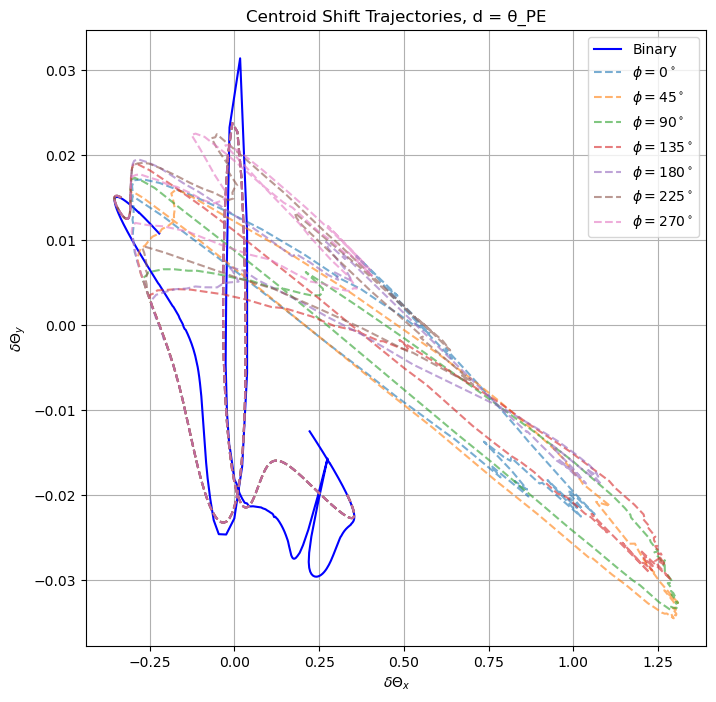

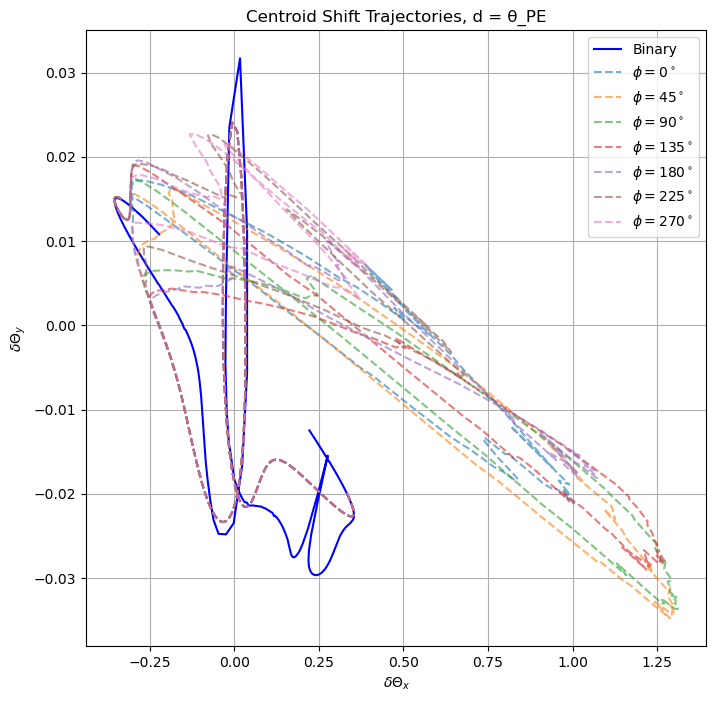

/Users/gregcc/Documents/GitHub/SURP25/Microlensing/TestML.py:931: RuntimeWarning: divide by zero encountered in divide
  npmus = np.convolve(npmus/np.min(npmus),psf, 'same')        # 卷积
/Users/gregcc/Documents/GitHub/SURP25/Microlensing/TestML.py:931: RuntimeWarning: invalid value encountered in divide
  npmus = np.convolve(npmus/np.min(npmus),psf, 'same')        # 卷积
/Users/gregcc/Documents/GitHub/SURP25/Microlensing/TestML.py:933: RuntimeWarning: invalid value encountered in cast
  npmus = npmus.astype(int)+1
/Users/gregcc/Documents/GitHub/SURP25/Microlensing/TestML.py:970: RuntimeWarning: overflow encountered in scalar multiply
  PHI1 = np.linspace(offset[i]+PHI[i]-dphi,offset[i]+PHI[i]+dphi, npmus[i]*basenum,endpoint = False)
/Users/gregcc/Documents/GitHub/SURP25/Microlensing/TestML.py:977: RuntimeWarning: overflow encountered in scalar multiply
  PHI2 = np.linspace(offset[i]+PHI[i]-dphi,offset[i]+PHI[i]+dphi, npmus[i]*basenum,endpoint = False)
/Users/gregcc/Documents/GitHub/SURP25

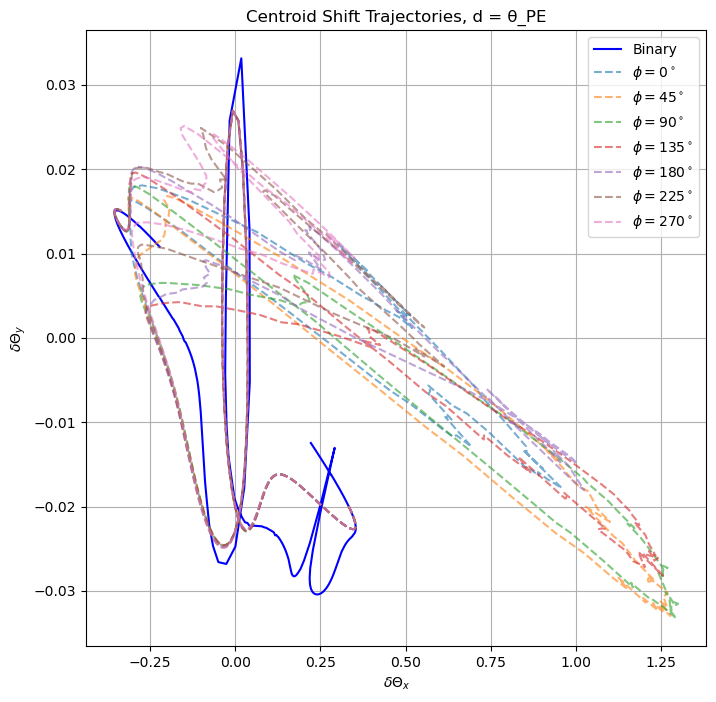

In [31]:
t0, tE = 0, 20
rho = rs = 0.0018
q2 = 1e-3                      # planet/star
qPM_list = [1e-3, 1e-2, 1e-1]  # moon/planet sweeps (your Fig. 7-style)
s2 = 1.3
u0_list = [-0.015]
alpha_deg = 357

out = run_triple_orbit_set(
    t0, tE, rho, u0_list,
    q2, qPM_list=qPM_list,
    s2=s2, alpha_deg=alpha_deg,
    rs=rs, secnum=45, basenum=2, num_points=1000,
    phi_deg_list=(0,45,90,135,180,225,270),
    plot_title="Centroid Shift Trajectories, d = θ_PE"
)